<a href="https://colab.research.google.com/github/AraiKensuke/GCoh/blob/master/simulations/Participant5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) Install necessary packages.

In [1]:
#########  clone and install necessary packages from github repositories

import sys
import importlib

if importlib.util.find_spec("GCoh") is None:
  !git clone https://github.com/AraiKensuke/GCoh.git

if importlib.util.find_spec("mne") is None:
  !pip install mne

sys.path.insert(1, "/content/GCoh")    #  add these to searchpath for python modules

Cloning into 'GCoh'...
remote: Enumerating objects: 155, done.
remote: Counting objects: 100% (155/155), done.
remote: Compressing objects: 100% (121/121), done.
remote: Total 155 (delta 94), reused 65 (delta 29), pack-reused 0
Receiving objects: 100% (155/155), 365.71 KiB | 668.00 KiB/s, done.
Resolving deltas: 100% (94/94), done.
     |████████████████████████████████| 6.9MB 5.2MB/s 


# 2)  Upload EEG or multichannel data
Expect a text data file with number of rows = number of temporal observations (ie 500Hz for 10 seconds would have 5000 rows), and number of columns is number of channels.  Click on "Browse" below, pick a file from local disk.  It will be
uploaded to Colab directory, and openned by python.

In [2]:
import numpy as _N
from google.colab import files
uploaded = files.upload()

#  this saves a file of the same name in CWD

keys = list(uploaded.keys())
EEG  = _N.loadtxt(keys[0])     #  this contains multichannel dat    [N_obs x # chs]

Saving Jan012021_05_00_00_artfctrmvd_v1.dat to Jan012021_05_00_00_artfctrmvd_v1.dat


In [ ]:
EEG  = _N.loadtxt(keys[0])     #  this contains multichannel dat    [N_obs x # chs]

# 3)  Calculate the GCoh and eigenvectors.  

Here the only thing to that might need to be changed is win and slideby.  Window over which GCoh is calculated, and
how much the window is slid (allows overlapping).  

**Warning, lots of ominmous looking warnings will be printed.  Ignore these**

In [3]:
import numpy as _N
import scipy.signal as _ssig
import mne.time_frequency as mtf
import mne
import pickle
import sys

import GCoh.chronux_py.chronux_funcs as _chrf
import preprocess_ver

import GCoh.datconfig as datconf
import GCoh.windowed_gcoh as _w_gcoh

dataset =    datconf._RPS    ####  Which data set to use?  
Fs      = 300

#####  These will call up preset values the win, slideby.  Don't have to use these, and
#####  can come up with own.
gcoh_ver    = 5    #  this is a preset one.  
#   wnd, slideby is # of

#  get preset values determined by gcoh_ver.  
#wnd, slideby      = preprocess_ver.get_win_slideby(gcoh_ver)
wnd = 2048
slideby=2048
#  If you know what you're doing, you can use your own.  In general, 
#  for overlapping, its simpler to use wnd some multiple of slideby, like
#  256 and 64.  This will use a window of 256 samples to calculate GCoh, and
#  then move over 64 samples to calculate next GCoh value.  This means 192 
#  samples will be shared between these two calculations, leading to correlation
#  in the GCoh.

rm_chs = []
ch_w_CM, rm_chs, ch_names, ch_types = datconf.getConfig(dataset)

X_cm    = EEG

ch_picks = _N.setdiff1d(ch_w_CM, _N.array(rm_chs))
arr_ch_picks = _N.array(ch_picks)

info = mne.create_info(ch_names=(_N.array(ch_names)[ch_picks]).tolist(), ch_types=(_N.array(ch_types)[ch_picks]).tolist(), sfreq=Fs)

datconf.set_montage(dataset, info)

#####  Calculate GCoh and eigenvectors
dpss_bw=7
f, findx, Ctot, Cvec = _w_gcoh.windowed_gcoh(Fs, wnd, slideby, X_cm, ch_w_CM, ch_picks, info, dpss_bw=dpss_bw)


    Using multitaper spectrum estimation with 46 DPSS windows
Not setting metadata
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
0  2048


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


2048  4096


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


4096  6144


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


6144  8192


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


8192  10240


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


10240  12288


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


12288  14336


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


14336  16384


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


16384  18432


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


18432  20480


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


20480  22528


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


22528  24576


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


24576  26624


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


26624  28672


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


28672  30720


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


30720  32768


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


32768  34816


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


34816  36864


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


36864  38912


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


38912  40960


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


40960  43008


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


43008  45056


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


45056  47104


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


47104  49152


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


49152  51200


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


51200  53248


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


53248  55296


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


55296  57344


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


57344  59392


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


59392  61440


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


61440  63488


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


63488  65536


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


65536  67584


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


67584  69632


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


69632  71680


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


71680  73728


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


73728  75776


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


75776  77824


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


77824  79872


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


79872  81920


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


81920  83968


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


83968  86016


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


86016  88064


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


88064  90112


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


90112  92160


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


92160  94208


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


94208  96256


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


96256  98304


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


98304  100352


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


100352  102400


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


102400  104448


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


104448  106496


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


106496  108544


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


108544  110592


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


110592  112640


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


112640  114688


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


114688  116736


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


116736  118784


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


118784  120832


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


120832  122880


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


122880  124928


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


124928  126976


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


126976  129024


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


129024  131072


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


131072  133120


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


133120  135168


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


135168  137216


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


137216  139264


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


139264  141312


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


141312  143360


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


143360  145408


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


145408  147456


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


147456  149504


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


149504  151552


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


151552  153600


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


153600  155648


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


155648  157696


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


157696  159744


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


159744  161792


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


161792  163840


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


163840  165888


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


165888  167936


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


167936  169984


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


169984  172032


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


172032  174080


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


174080  176128


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


176128  178176


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


178176  180224


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


180224  182272


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


182272  184320


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


184320  186368


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


186368  188416


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


188416  190464


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


190464  192512


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


192512  194560


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


194560  196608


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


196608  198656


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


198656  200704


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


200704  202752


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


202752  204800


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


204800  206848


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


206848  208896


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


208896  210944


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


210944  212992


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


212992  215040


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


215040  217088


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


217088  219136


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


219136  221184


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


221184  223232


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


223232  225280


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


225280  227328


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


227328  229376


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


229376  231424


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


231424  233472


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


233472  235520


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


235520  237568


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


237568  239616


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


239616  241664


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


241664  243712


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


243712  245760


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


245760  247808


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


247808  249856


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


249856  251904


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


251904  253952


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


253952  256000


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


256000  258048


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


258048  260096


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


260096  262144


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


262144  264192


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


264192  266240


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


266240  268288


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


268288  270336


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


270336  272384


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


272384  274432


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


274432  276480


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


276480  278528


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


278528  280576


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


280576  282624


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


282624  284672


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


284672  286720


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


286720  288768


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


288768  290816


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


290816  292864


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


292864  294912


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


294912  296960


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


296960  299008


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


299008  301056


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


301056  303104


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


303104  305152


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


305152  307200


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


307200  309248


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


309248  311296


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


311296  313344


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


313344  315392


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


315392  317440


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


317440  319488


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


319488  321536


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


321536  323584


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


323584  325632


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


325632  327680


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


327680  329728


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


329728  331776


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


331776  333824


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


333824  335872


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


335872  337920


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


337920  339968


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


339968  342016


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


342016  344064


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


344064  346112


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


346112  348160


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


348160  350208


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


350208  352256


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


352256  354304


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


354304  356352


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


356352  358400


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


358400  360448


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


360448  362496


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


362496  364544


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


364544  366592


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


366592  368640


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


368640  370688


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


370688  372736


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


372736  374784


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


374784  376832


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


376832  378880


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


378880  380928


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


380928  382976


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


382976  385024


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


385024  387072


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


387072  389120


/content/GCoh/windowed_gcoh.py:68: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd = mtf.csd_multitaper(epochs, tmin=(t0/Fs), tmax=(t1/Fs), fmin=fMin, fmax=fMax, n_fft=wnd, bandwidth=dpss_bw, adaptive=False, low_bias=True, projs=None, n_jobs=1, verbose=False)


# 4) Cluster and visualize Eigenvalues

doing GMM
@!!!!! 
(array([0]), array([75]))
manual_clustering   False


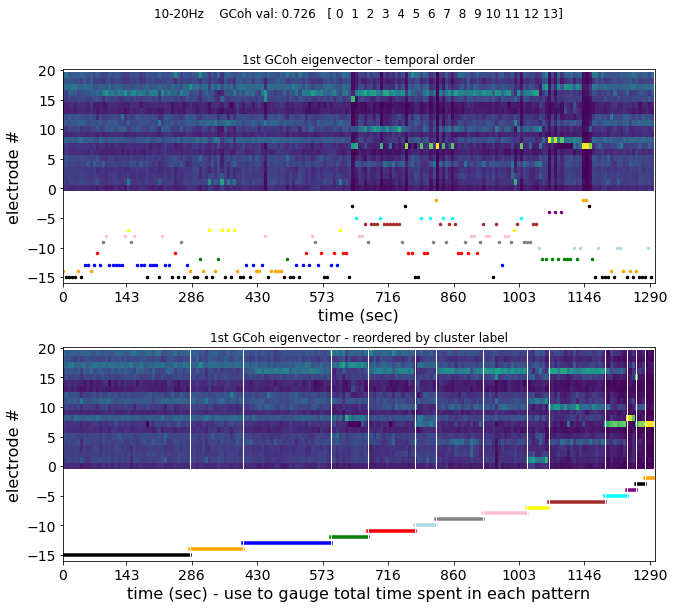

In [6]:
import scipy.stats as _ss
import matplotlib.pyplot as _plt
from sklearn import mixture
from GCoh.eeg_util import unique_in_order_of_appearance, increasing_labels_mapping, rmpd_lab_trnsfrm, find_or_retrieve_GMM_labels, shift_correlated_shuffle, mtfftc
import GCoh.preprocess_ver as _ppv

arr_ch_names = _N.array(ch_names)

ev_n   = 0

win = wnd

_WIDE = 0
_MED  = 1
_FINE = 2
_FINE1 = 3   #



#bin     = 512
#slide   = 64
_WIDE = 0
_FINE = 1

manual_cluster=False

hlfOverlap = int((wnd/slideby)*0.5)

strt       = 0  #  if start at middle of experiment
A_gcoh     = Cvec[strt:]
fs       = f[findx]

imag_evs  = Cvec[strt:, :, ev_n]

L_gcoh  = A_gcoh.shape[0]
nChs    = imag_evs.shape[2]
real_evs  = _N.empty((L_gcoh, fs.shape[0], nChs))



chs = _N.arange(nChs)
ch_names = arr_ch_names[chs].tolist()

for ti in range(L_gcoh):
    real_evs[ti] = _N.abs(imag_evs[ti])

mn = _N.mean(real_evs, axis=0)
sd = _N.std(real_evs, axis=0)


frngs = [10, 20]    ##  frequency ranges (low and high) to look at for clustering.  

ignore_stored = True
pcs     = _N.empty(len(frngs))
####  set range of clusters to look for
minK    = 14
maxK    =15

try_Ks  = _N.arange(minK, maxK+1)
#TRs      = _N.array([1, 1, 3, 5, 10, 15, 20, 25, 25])  # more tries for higher K
TRs      = _N.array([1, 15, 20, 25, 25, 30, 40, 50, 60, 60, 60, 60, 60, 60, 80, 80, 80, 80])  # more tries for higher K

bics = _N.ones(((maxK-minK), _N.max(TRs)))*1000000
labs = _N.empty((maxK-minK, _N.max(TRs), real_evs.shape[0]), dtype=_N.int)

nState_start = 0

fL = frngs[0]
fH = frngs[1]

irngs = _N.where((fs > fL) & (fs < fH))[0]
iL    = irngs[0]
iH    = irngs[-1]    

#Apr242020_16_53_03_gcoh_256_64
nStates, rmpd_lab = find_or_retrieve_GMM_labels(None, None, None, real_evs, iL, iH, fL, fH, 1, gcoh_ver, which=0, try_K=try_Ks, TRs=TRs, ignore_stored=ignore_stored, manual_cluster=manual_cluster, do_pca=False, min_var_expld=0.95, dontsave=True)
ps = _N.arange(nStates)
ps += nState_start
nState_start += nStates

#nStates, rmpd_lab = find_or_retrieve_GMM_labels(rpsm[dat], "%(dat)s_gcoh_%(w)d_%(s)d" % {"dat" : dat, "w" : bin, "s" : slide}, real_evs, iL, iH, fL, fH, which=0, try_K=try_Ks, TRs=TRs, log_transform=False)
"""
###############
for K in range(minK, maxK):
    for tr in range(TRs[K]):
        gmm = mixture.GaussianMixture(n_components=K, covariance_type="full")

        gmm.fit(_N.sum(real_evs[:, iL:iH], axis=1))
        bics[K-minK, tr] = gmm.bic(_N.sum(real_evs[:, iL:iH], axis=1))
        labs[K-minK, tr] = gmm.predict(_N.sum(real_evs[:, iL:iH], axis=1))

coords = _N.where(bics == _N.min(bics))
print("min bic %.4e" % _N.min(bics))
bestLab = labs[coords[0][0], coords[1][0]]   #  indices in 2-D array
rmpd_lab = increasing_labels_mapping(bestLab)

nStates =  list(range(minK, maxK))[coords[0][0]]
"""
out_u = _N.mean(real_evs[:, iL:iH], axis=1)
out = _N.empty((L_gcoh, nChs))
iS  = 0
for ns in range(nStates):
    ls = _N.where(rmpd_lab == ns)[0]
    out[iS:iS+len(ls)] = _N.mean(real_evs[ls, iL:iH], axis=1)
    iS += len(ls)

iS = 0
clrs  = ["black", "orange", "blue", "green", "red", "lightblue", "grey", "pink", "yellow", "brown", "cyan", "purple", "black", "orange", "blue", "green", "red", "black", "orange", "blue", "green", "red", "lightblue", "grey", "pink", "yellow", "brown", "cyan", "purple", "black", "orange", "blue", "green", "red"]
W   = L_gcoh
H   = nChs
disp_wh_ratio = 5
aspect = (W/H)/disp_wh_ratio
unit = 2.5
fig = _plt.figure(figsize=(disp_wh_ratio*unit + 1, 3*unit+unit/2))
#   time of middle of window in which GCoh calculated
gcoh_ts = _N.linspace(0, (slideby/Fs)*L_gcoh, L_gcoh, endpoint=False) + (win/2)/Fs
gcoh_bins=_N.arange(L_gcoh)
T_max   = gcoh_ts[-1]
time_at_ticks = _N.array(_N.linspace(0, _N.floor(T_max/10)*10, 10), dtype=_N.int)
bin_at_ticks = _N.interp(time_at_ticks, gcoh_ts, gcoh_bins)

_plt.subplot2grid((2, 1), (0, 0))        
_plt.title("1st GCoh eigenvector - temporal order")
#fig.add_subplot(nStates+2, 1, 1)  
_plt.imshow(out_u.T, aspect=aspect)
_plt.ylim(-(nStates+2), nChs+0.1)
for ns in range(nStates):
    nsx = _N.where(rmpd_lab == ns)[0]
    _plt.scatter(nsx, _N.ones(len(nsx))*ns - nStates - 1, color=clrs[ns], lw=1.5, s=4)
_plt.xlim(0, L_gcoh)
_plt.xlabel("(sample #) - not in experimental temporal order", fontsize=17)
_plt.ylabel("electrode #", fontsize=16)
_plt.xlabel("time (sec)", fontsize=16)
_plt.xticks(bin_at_ticks, time_at_ticks, fontsize=14)
_plt.yticks(fontsize=14)

_plt.subplot2grid((2, 1), (1, 0))        
_plt.title("1st GCoh eigenvector - reordered by cluster label")
#fig.add_subplot(nStates+2, 1, 1)    
_plt.imshow(out.T, aspect=aspect)
_plt.ylim(-(nStates+2), nChs+0.1)
for ns in range(nStates):
    ls = _N.where(rmpd_lab == ns)[0]
    liS = iS
    iS += len(ls)
    _plt.plot([liS, iS], [ns-nStates-1, ns-nStates-1], color=clrs[ns], lw=3.5)
    if ns < nStates-1:
        _plt.axvline(x=iS, color="white", lw=1)
_plt.xlim(0, L_gcoh)
_plt.suptitle("%(1)d-%(2)dHz    GCoh val: %(gcoh).3f   %(sts)s" % {"1" : fL, "2" : fH, "gcoh" : _N.mean(Ctot[:, irngs]), "sts" : str(ps)})
_plt.xlabel("(sample #) - not in experimental temporal order", fontsize=17)
_plt.ylabel("electrode #", fontsize=16)
_plt.xlabel("time (sec) - use to gauge total time spent in each pattern", fontsize=16)
_plt.xticks(bin_at_ticks, time_at_ticks, fontsize=14)
_plt.yticks(fontsize=14)

iS = 0
for ns in range(nStates):
    ls = _N.where(rmpd_lab == ns)[0]
    iS += len(ls)
    if ns < nStates-1:
        _plt.axvline(x=iS, color="white", lw=1)
fig.subplots_adjust(left=0.1, bottom=0.1, right=0.9, hspace=0.3)
